# Loading data 

In [33]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

In [34]:
def gen_labels(im_name, pat1, pat2):
    '''
    Parameters
    ----------
    im_name : Str
        The image file name.
    pat1 : Str
        A string pattern in the filename for 1st class, e.g "Mel"
    pat2 : Str
        A string pattern in the filename 2nd class, e.g, "Nev" 
    Returns
    -------
    Label : Numpy array        
        Class label of the filename name based on its pattern.
    '''
    if pat1 in im_name:
        label = np.array([0])
    elif pat2 in im_name:
        label = np.array([1])
    return label


def get_data(data_path, data_list, img_h, img_w):
    """
    Parameters
    ----------
    train_data_path : Str
        Path to the data directory
    train_list : List
        A list containing the name of the images.
    img_h : Int
        image height to be resized to.
    img_w : Int
        image width to be resized to.    
    Returns
    -------
    img_labels : Nested List
        A nested list containing the loaded images along with their
        correcponding labels.
    """
    img_labels = []       
    for item in enumerate(data_list):
        img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')]) 
        
        if item[0] % 100 == 0:
             print('Reading: {0}/{1}  of train images'.format(item[0], len(data_list)))
             
    shuffle(img_labels)
    return img_labels


def get_data_arrays(nested_list, img_h, img_w):
    """
    Parameters
    ----------
    nested_list : nested list
        nested list of image arrays with corresponding class labels.
    img_h : Int
        Image height.
    img_w : Int
        Image width.
    Returns
    -------
    img_arrays : Numpy array
        4D Array with the size of (n_data,img_h,img_w, 1)
    label_arrays : Numpy array
        1D array with the size (n_data).
    """
    img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
    label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
    for ind in range(len(nested_list)):
        img_arrays[ind] = nested_list[ind][0]
        label_arrays[ind] = nested_list[ind][1]
    img_arrays = np.expand_dims(img_arrays, axis =3)
    return img_arrays, label_arrays


def get_train_test_arrays(train_data_path, test_data_path, train_list,
                          test_list, img_h, img_w):
    """
    Get the directory to the train and test sets, the files names and
    the size of the image and return the image and label arrays for
    train and test sets.
    """
    
    train_data = get_data(train_data_path, train_list, img_h, img_w)
    test_data = get_data(test_data_path, test_list, img_h, img_w)
    
    train_img, train_label =  get_data_arrays(train_data, img_h, img_w)
    test_img, test_label = get_data_arrays(test_data, img_h, img_w)
    del(train_data)
    del(test_data)      
    return train_img, test_img, train_label, test_label

In [46]:
img_w, img_h = 128, 128      # Setting the width and heights of the images.
data_path = '/DL_course_data/Lab1/Skin/'     # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train, x_test, y_train, y_test = get_train_test_arrays(
        train_data_path, test_data_path,
        train_list, test_list, img_h, img_w)

Reading: 0/1000  of train images
Reading: 100/1000  of train images
Reading: 200/1000  of train images
Reading: 300/1000  of train images
Reading: 400/1000  of train images
Reading: 500/1000  of train images
Reading: 600/1000  of train images
Reading: 700/1000  of train images
Reading: 800/1000  of train images
Reading: 900/1000  of train images
Reading: 0/200  of train images
Reading: 100/200  of train images


# Task 6A

In [36]:
# Logic operator with Tensorflow Keras and importation of matplotlib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [37]:
def model(img_ch, img_width, img_height, n_base):
    model = Sequential()
    
    model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model


In [6]:
img_w, img_h = 128, 128
base = 32
n_epochs = 50
batchsize = 8
LR = 0.0001

clf = model(1, img_w, img_h, base)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       7

In [7]:
clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])

In [8]:
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))

Train on 1000 samples, validate on 200 samples
Epoch 1/50
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.6940 - binary_accuracy: 0.5060 - val_loss: 0.6923 - val_binary_accuracy: 0.5000
Epoch 2/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6947 - binary_accuracy: 0.5300 - val_loss: 0.6913 - val_binary_accuracy: 0.6800
Epoch 3/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6936 - binary_accuracy: 0.5600 - val_loss: 0.6899 - val_binary_accuracy: 0.5000
Epoch 4/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6755 - binary_accuracy: 0.6110 - val_loss: 0.6777 - val_binary_accuracy: 0.5850
Epoch 5/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6470 - binary_accuracy: 0.6250 - val_loss: 0.6246 - val_binary_accuracy: 0.6200
Epoch 6/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5807 - binary_accuracy: 0.7070 - val_loss: 0.6615 - val_binary_accuracy: 

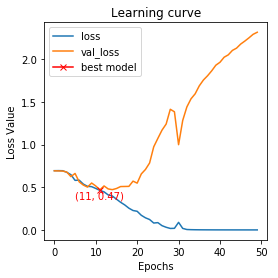

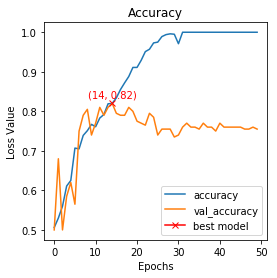

In [12]:
import matplotlib.pyplot as plt
#Loss
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
xmin = np.argmin(clf_hist.history["val_loss"])
ymin = np.min(clf_hist.history["val_loss"])
plt.plot( xmin, ymin, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
             horizontalalignment = "center", verticalalignment = "top", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('6A/loss_32base.png', dpi = 200)

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('6A/acc_32base.png', dpi = 200)

### _Comments_
The model fit quite well the training model, because at the last iteration, the loss value is really close to 0. But the validation dataset is not well fitted and it is worse through the iterations, this shows a clear overfitting.

# Task 6B

In [13]:
def model_dropout(img_ch, img_width, img_height, n_base):
    model = Sequential()
    
    model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0,4))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 8)       80        
_________________________________________________________________
activation_8 (Activation)    (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_9 (Activation)    (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)       

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2952 - binary_accuracy: 0.8900 - val_loss: 0.4905 - val_binary_accuracy: 0.8000
Epoch 34/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2772 - binary_accuracy: 0.8860 - val_loss: 0.5473 - val_binary_accuracy: 0.8050
Epoch 35/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2705 - binary_accuracy: 0.8860 - val_loss: 0.5213 - val_binary_accuracy: 0.8100
Epoch 36/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2644 - binary_accuracy: 0.9010 - val_loss: 0.5643 - val_binary_accuracy: 0.7750
Epoch 37/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2472 - binary_accuracy: 0.9040 - val_loss: 0.6263 - val_binary_accuracy: 0.7450
Epoch 38/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2361 - binary_accuracy: 0.9060 - val_loss: 0.5422 - val_binary_accuracy: 0.8050
Epoch 39/50
1000/1000 [=======================

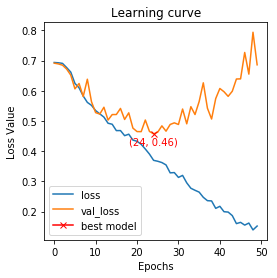

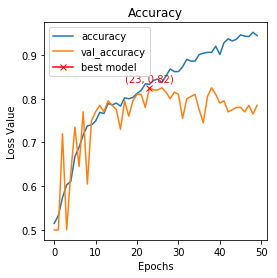

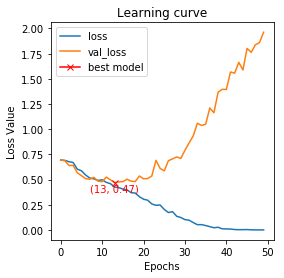

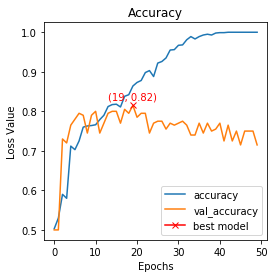

In [14]:
# Without dropout

img_w, img_h = 128, 128
n_epochs = 50
batchsize = 8
LR = 0.0001

for base in [8,16]:
    #Building the models
    clf = model(1, img_w, img_h, base)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))
    
    #Plotting curves
    #Loss
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    xmin = np.argmin(clf_hist.history["val_loss"])
    ymin = np.min(clf_hist.history["val_loss"])
    plt.plot( xmin, ymin, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
                 horizontalalignment = "center", verticalalignment = "top", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6B/loss_'+str(base)+'.png', dpi = 200)

    #Accuracy
    plt.figure(figsize=(4, 4))
    plt.title("Accuracy")
    plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
    plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
    ymax = np.max(clf_hist.history["val_binary_accuracy"])
    plt.plot( xmax, ymax, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6B/acc_'+str(base)+'.png', dpi = 200)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
activation_24 (Activation)   (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_25 (Activation)   (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)       

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5541 - binary_accuracy: 0.7380 - val_loss: 0.5152 - val_binary_accuracy: 0.7800
Epoch 12/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5238 - binary_accuracy: 0.7620 - val_loss: 0.5157 - val_binary_accuracy: 0.7850
Epoch 13/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5231 - binary_accuracy: 0.7530 - val_loss: 0.5133 - val_binary_accuracy: 0.7850
Epoch 14/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5042 - binary_accuracy: 0.7660 - val_loss: 0.5885 - val_binary_accuracy: 0.6950
Epoch 15/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5071 - binary_accuracy: 0.7600 - val_loss: 0.4850 - val_binary_accuracy: 0.8150
Epoch 16/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4967 - binary_accuracy: 0.7800 - val_loss: 0.4825 - val_binary_accuracy: 0.8100
Epoch 17/150
1000/1000 [=================

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0201 - binary_accuracy: 0.9930 - val_loss: 1.6449 - val_binary_accuracy: 0.7400
Epoch 112/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0151 - binary_accuracy: 0.9980 - val_loss: 1.8609 - val_binary_accuracy: 0.7600
Epoch 113/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0047 - binary_accuracy: 1.0000 - val_loss: 2.0326 - val_binary_accuracy: 0.7550
Epoch 114/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0080 - binary_accuracy: 0.9980 - val_loss: 2.0059 - val_binary_accuracy: 0.7450
Epoch 115/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0076 - binary_accuracy: 0.9980 - val_loss: 1.9664 - val_binary_accuracy: 0.7650
Epoch 116/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0051 - binary_accuracy: 0.9980 - val_loss: 2.0582 - val_binary_accuracy: 0.7600
Epoch 117/150
1000/1000 [===========

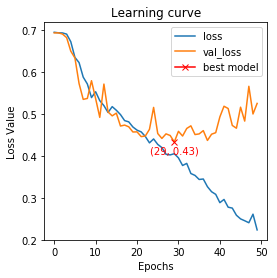

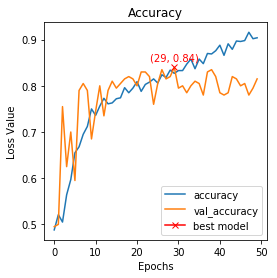

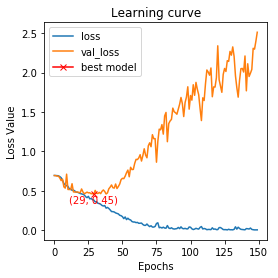

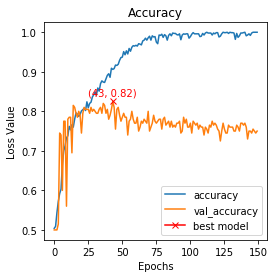

In [15]:
# With dropout

img_w, img_h = 128, 128
batchsize = 8
LR = 0.0001
base = 8

for n_epochs in [50, 150]:
    #Building the models
    clf = model_dropout(1, img_w, img_h, base)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))
    
    #Plotting curves
    #Loss
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    xmin = np.argmin(clf_hist.history["val_loss"])
    ymin = np.min(clf_hist.history["val_loss"])
    plt.plot( xmin, ymin, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
                 horizontalalignment = "center", verticalalignment = "top", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6B/loss_'+str(n_epochs)+'_with_dropout.png', dpi = 200)

    #Accuracy
    plt.figure(figsize=(4, 4))
    plt.title("Accuracy")
    plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
    plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
    ymax = np.max(clf_hist.history["val_binary_accuracy"])
    plt.plot( xmax, ymax, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6B/acc_'+str(n_epochs)+'_with_dropout.png', dpi = 200)
    

### _Comments_
Reducing the n_base reduces the overfitting but does not cancel it. It is normal that it reduces it because there are less neuron and it will fit less the noise of the training dataset. 
As expected the dropout layer reduces also the overfitting, however it doesn't cancel it either. This reduce is expected because the drop out layer randomly delete some neurons in the dense layer, making the learning power of the network weaker and therefore it cannot fit too well the training dataset.

# Tak 6C

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
activation_40 (Activation)   (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_41 (Activation)   (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 32)       

Epoch 33/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5616 - binary_accuracy: 0.7540 - val_loss: 0.5692 - val_binary_accuracy: 0.7600
Epoch 34/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5613 - binary_accuracy: 0.7360 - val_loss: 0.5563 - val_binary_accuracy: 0.7650
Epoch 35/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5602 - binary_accuracy: 0.7370 - val_loss: 0.5525 - val_binary_accuracy: 0.7600
Epoch 36/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5546 - binary_accuracy: 0.7540 - val_loss: 0.5667 - val_binary_accuracy: 0.7200
Epoch 37/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5489 - binary_accuracy: 0.7480 - val_loss: 0.5464 - val_binary_accuracy: 0.7650
Epoch 38/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5459 - binary_accuracy: 0.7360 - val_loss: 0.5489 - val_binary_accuracy: 0.7650
Epoch 39/150
1000/1000 [====

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4632 - binary_accuracy: 0.7990 - val_loss: 0.4747 - val_binary_accuracy: 0.7850
Epoch 134/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4679 - binary_accuracy: 0.7960 - val_loss: 0.4786 - val_binary_accuracy: 0.8100
Epoch 135/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4593 - binary_accuracy: 0.7930 - val_loss: 0.4751 - val_binary_accuracy: 0.8150
Epoch 136/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4628 - binary_accuracy: 0.7970 - val_loss: 0.5110 - val_binary_accuracy: 0.7900
Epoch 137/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4721 - binary_accuracy: 0.7870 - val_loss: 0.4795 - val_binary_accuracy: 0.8100
Epoch 138/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4697 - binary_accuracy: 0.7900 - val_loss: 0.5141 - val_binary_accuracy: 0.7900
Epoch 139/150
1000/1000 [===========

Epoch 15/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6574 - binary_accuracy: 0.6890 - val_loss: 0.6578 - val_binary_accuracy: 0.6650
Epoch 16/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6487 - binary_accuracy: 0.6830 - val_loss: 0.6554 - val_binary_accuracy: 0.6200
Epoch 17/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6390 - binary_accuracy: 0.6920 - val_loss: 0.6406 - val_binary_accuracy: 0.6950
Epoch 18/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6334 - binary_accuracy: 0.6950 - val_loss: 0.6326 - val_binary_accuracy: 0.7200
Epoch 19/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6228 - binary_accuracy: 0.6930 - val_loss: 0.6329 - val_binary_accuracy: 0.6500
Epoch 20/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6142 - binary_accuracy: 0.7030 - val_loss: 0.6172 - val_binary_accuracy: 0.7200
Epoch 21/350
1000/1000 [====

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4832 - binary_accuracy: 0.7620 - val_loss: 0.5021 - val_binary_accuracy: 0.7450
Epoch 116/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4851 - binary_accuracy: 0.7770 - val_loss: 0.5031 - val_binary_accuracy: 0.7450
Epoch 117/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4867 - binary_accuracy: 0.7770 - val_loss: 0.4900 - val_binary_accuracy: 0.7750
Epoch 118/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4858 - binary_accuracy: 0.7700 - val_loss: 0.5027 - val_binary_accuracy: 0.8000
Epoch 119/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4847 - binary_accuracy: 0.7840 - val_loss: 0.4845 - val_binary_accuracy: 0.7800
Epoch 120/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4819 - binary_accuracy: 0.7720 - val_loss: 0.4851 - val_binary_accuracy: 0.8300
Epoch 121/350
1000/1000 [===========

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4246 - binary_accuracy: 0.8200 - val_loss: 0.4622 - val_binary_accuracy: 0.8100
Epoch 216/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4241 - binary_accuracy: 0.8070 - val_loss: 0.4537 - val_binary_accuracy: 0.8250
Epoch 217/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4203 - binary_accuracy: 0.8190 - val_loss: 0.4584 - val_binary_accuracy: 0.8000
Epoch 218/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4230 - binary_accuracy: 0.8300 - val_loss: 0.4527 - val_binary_accuracy: 0.8250
Epoch 219/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4259 - binary_accuracy: 0.8120 - val_loss: 0.4520 - val_binary_accuracy: 0.8200
Epoch 220/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4254 - binary_accuracy: 0.8180 - val_loss: 0.4527 - val_binary_accuracy: 0.8250
Epoch 221/350
1000/1000 [===========

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3525 - binary_accuracy: 0.8500 - val_loss: 0.4419 - val_binary_accuracy: 0.8100
Epoch 316/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3518 - binary_accuracy: 0.8590 - val_loss: 0.4533 - val_binary_accuracy: 0.8150
Epoch 317/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3577 - binary_accuracy: 0.8560 - val_loss: 0.4450 - val_binary_accuracy: 0.8250
Epoch 318/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3519 - binary_accuracy: 0.8620 - val_loss: 0.4425 - val_binary_accuracy: 0.8200
Epoch 319/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3495 - binary_accuracy: 0.8490 - val_loss: 0.4514 - val_binary_accuracy: 0.8150
Epoch 320/350
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3527 - binary_accuracy: 0.8470 - val_loss: 0.4508 - val_binary_accuracy: 0.8150
Epoch 321/350
1000/1000 [===========

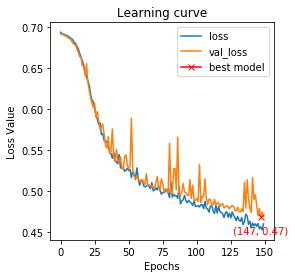

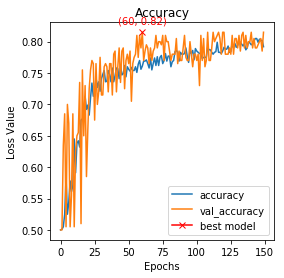

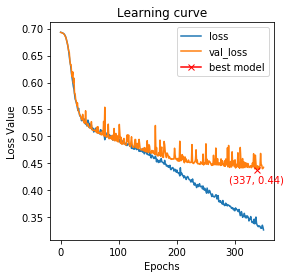

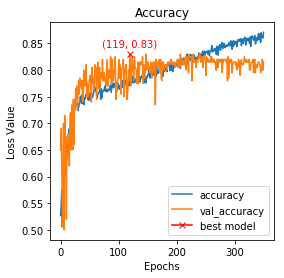

In [16]:
img_w, img_h = 128, 128
base = 8
batchsize = 8
LR = 1e-5
for n_epochs in [150, 350]:
    #Building the models
    clf = model(1, img_w, img_h, base)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))
    
    #Plotting curves
    #Loss
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    xmin = np.argmin(clf_hist.history["val_loss"])
    ymin = np.min(clf_hist.history["val_loss"])
    plt.plot( xmin, ymin, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
                 horizontalalignment = "center", verticalalignment = "top", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6C/loss_'+str(n_epochs)+'.png', dpi = 200)

    #Accuracy
    plt.figure(figsize=(4, 4))
    plt.title("Accuracy")
    plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
    plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
    ymax = np.max(clf_hist.history["val_binary_accuracy"])
    plt.plot( xmax, ymax, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6C/acc_'+str(n_epochs)+'.png', dpi = 200)

### _Comments_
blabla

# Task 6D

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
activation_56 (Activation)   (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_57 (Activation)   (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 32)       

Epoch 33/150
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.5078 - binary_accuracy: 0.7580 - val_loss: 0.5023 - val_binary_accuracy: 0.7950
Epoch 34/150
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.5112 - binary_accuracy: 0.7520 - val_loss: 0.5000 - val_binary_accuracy: 0.7900
Epoch 35/150
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.5059 - binary_accuracy: 0.7640 - val_loss: 0.5001 - val_binary_accuracy: 0.7900
Epoch 36/150
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.5025 - binary_accuracy: 0.7640 - val_loss: 0.5002 - val_binary_accuracy: 0.7850
Epoch 37/150
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.4976 - binary_accuracy: 0.7650 - val_loss: 0.4954 - val_binary_accuracy: 0.7900
Epoch 38/150
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.4987 - binary_accuracy: 0.7720 - val_loss: 0.5034 - val_binary_accuracy: 0.7900
Epoch 39/150
1000/1000 [====

1000/1000 [==============================] - 4s 4ms/sample - loss: 0.3164 - binary_accuracy: 0.8690 - val_loss: 0.4558 - val_binary_accuracy: 0.8350
Epoch 134/150
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.3183 - binary_accuracy: 0.8620 - val_loss: 0.4405 - val_binary_accuracy: 0.8400
Epoch 135/150
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.3159 - binary_accuracy: 0.8700 - val_loss: 0.4471 - val_binary_accuracy: 0.8200
Epoch 136/150
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.3103 - binary_accuracy: 0.8730 - val_loss: 0.4449 - val_binary_accuracy: 0.8250
Epoch 137/150
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.3113 - binary_accuracy: 0.8580 - val_loss: 0.4417 - val_binary_accuracy: 0.8350
Epoch 138/150
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.3062 - binary_accuracy: 0.8770 - val_loss: 0.4451 - val_binary_accuracy: 0.8350
Epoch 139/150
1000/1000 [===========

Epoch 15/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6369 - binary_accuracy: 0.6690 - val_loss: 0.6411 - val_binary_accuracy: 0.6700
Epoch 16/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6292 - binary_accuracy: 0.6920 - val_loss: 0.6356 - val_binary_accuracy: 0.7050
Epoch 17/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6224 - binary_accuracy: 0.6950 - val_loss: 0.6334 - val_binary_accuracy: 0.6300
Epoch 18/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6149 - binary_accuracy: 0.7100 - val_loss: 0.6250 - val_binary_accuracy: 0.6450
Epoch 19/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6051 - binary_accuracy: 0.6900 - val_loss: 0.6071 - val_binary_accuracy: 0.7050
Epoch 20/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6012 - binary_accuracy: 0.6920 - val_loss: 0.6016 - val_binary_accuracy: 0.7000
Epoch 21/150
1000/1000 [====

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4443 - binary_accuracy: 0.8040 - val_loss: 0.4756 - val_binary_accuracy: 0.7950
Epoch 116/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4457 - binary_accuracy: 0.7940 - val_loss: 0.4607 - val_binary_accuracy: 0.8350
Epoch 117/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4443 - binary_accuracy: 0.7960 - val_loss: 0.4611 - val_binary_accuracy: 0.8350
Epoch 118/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4408 - binary_accuracy: 0.7980 - val_loss: 0.4677 - val_binary_accuracy: 0.8250
Epoch 119/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4434 - binary_accuracy: 0.8030 - val_loss: 0.4624 - val_binary_accuracy: 0.8350
Epoch 120/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4424 - binary_accuracy: 0.7960 - val_loss: 0.4605 - val_binary_accuracy: 0.8250
Epoch 121/150
1000/1000 [===========

Epoch 1/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6932 - binary_accuracy: 0.5230 - val_loss: 0.6927 - val_binary_accuracy: 0.5600
Epoch 2/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6927 - binary_accuracy: 0.5470 - val_loss: 0.6923 - val_binary_accuracy: 0.6100
Epoch 3/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6925 - binary_accuracy: 0.5530 - val_loss: 0.6919 - val_binary_accuracy: 0.6950
Epoch 4/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6922 - binary_accuracy: 0.5550 - val_loss: 0.6916 - val_binary_accuracy: 0.6500
Epoch 5/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6914 - binary_accuracy: 0.5670 - val_loss: 0.6907 - val_binary_accuracy: 0.6350
Epoch 6/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6908 - binary_accuracy: 0.5600 - val_loss: 0.6900 - val_binary_accuracy: 0.6950
Epoch 7/150
1000/1000 [===========

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4765 - binary_accuracy: 0.7840 - val_loss: 0.4881 - val_binary_accuracy: 0.7950
Epoch 102/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4757 - binary_accuracy: 0.7900 - val_loss: 0.4871 - val_binary_accuracy: 0.7950
Epoch 103/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4777 - binary_accuracy: 0.7860 - val_loss: 0.4873 - val_binary_accuracy: 0.8000
Epoch 104/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4790 - binary_accuracy: 0.7900 - val_loss: 0.5061 - val_binary_accuracy: 0.8050
Epoch 105/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4752 - binary_accuracy: 0.7900 - val_loss: 0.4887 - val_binary_accuracy: 0.8000
Epoch 106/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4757 - binary_accuracy: 0.7890 - val_loss: 0.4865 - val_binary_accuracy: 0.8000
Epoch 107/150
1000/1000 [===========

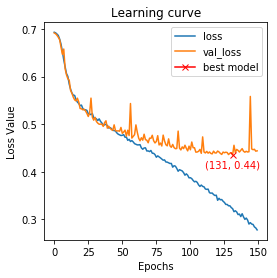

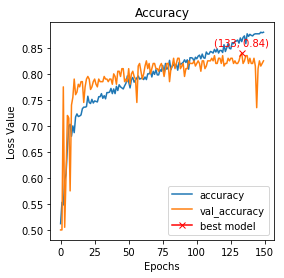

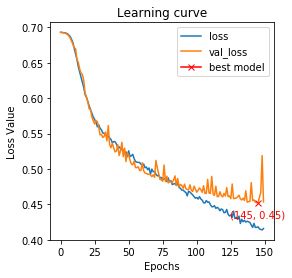

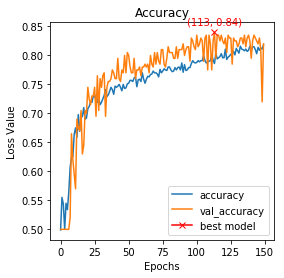

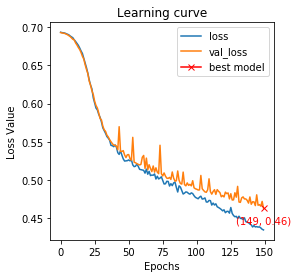

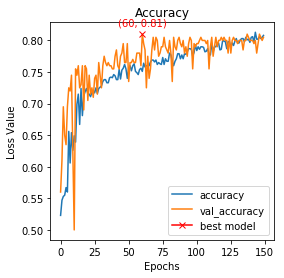

In [17]:
img_w, img_h = 128, 128
base = 8
n_epochs = 150
LR = 1e-5
for batchsize in [2,4,8]:
    #Building the model
    clf = model(1, img_w, img_h, base)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))
    
    #Loss
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    xmin = np.argmin(clf_hist.history["val_loss"])
    ymin = np.min(clf_hist.history["val_loss"])
    plt.plot( xmin, ymin, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
                 horizontalalignment = "center", verticalalignment = "top", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6D/loss_batchsize_'+str(batchsize)+'.png', dpi = 200)
    
    #Accuracy
    plt.figure(figsize=(4, 4))
    plt.title("Accuracy")
    plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
    plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
    ymax = np.max(clf_hist.history["val_binary_accuracy"])
    plt.plot( xmax, ymax, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6D/acc_batchsize_'+str(batchsize)+'.png', dpi = 200)

# Task 6E

#### _Finding the porper learning rate_

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
activation_80 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
activation_81 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 128)     

Epoch 33/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6933 - binary_accuracy: 0.4820 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 34/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6932 - binary_accuracy: 0.4900 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 35/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6932 - binary_accuracy: 0.4860 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 36/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6932 - binary_accuracy: 0.4920 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 37/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6933 - binary_accuracy: 0.4960 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 38/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6933 - binary_accuracy: 0.4880 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 39/150
1000/1000 [====

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6933 - binary_accuracy: 0.4760 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 134/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6933 - binary_accuracy: 0.4860 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 135/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6932 - binary_accuracy: 0.4860 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 136/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 137/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 138/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6932 - binary_accuracy: 0.4760 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 139/150
1000/1000 [===========

Epoch 15/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4127 - binary_accuracy: 0.8190 - val_loss: 0.4590 - val_binary_accuracy: 0.8250
Epoch 16/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3809 - binary_accuracy: 0.8400 - val_loss: 0.4861 - val_binary_accuracy: 0.8100
Epoch 17/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3610 - binary_accuracy: 0.8440 - val_loss: 0.5486 - val_binary_accuracy: 0.7800
Epoch 18/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3315 - binary_accuracy: 0.8630 - val_loss: 0.5031 - val_binary_accuracy: 0.7900
Epoch 19/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3288 - binary_accuracy: 0.8640 - val_loss: 0.4852 - val_binary_accuracy: 0.8000
Epoch 20/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2964 - binary_accuracy: 0.8830 - val_loss: 0.4812 - val_binary_accuracy: 0.8050
Epoch 21/150
1000/1000 [====

1000/1000 [==============================] - 1s 1ms/sample - loss: 7.2896e-05 - binary_accuracy: 1.0000 - val_loss: 2.5005 - val_binary_accuracy: 0.7450
Epoch 66/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 6.4554e-05 - binary_accuracy: 1.0000 - val_loss: 2.5386 - val_binary_accuracy: 0.7500
Epoch 67/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 6.0820e-05 - binary_accuracy: 1.0000 - val_loss: 2.5562 - val_binary_accuracy: 0.7450
Epoch 68/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 5.5279e-05 - binary_accuracy: 1.0000 - val_loss: 2.5276 - val_binary_accuracy: 0.7450
Epoch 69/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 5.0610e-05 - binary_accuracy: 1.0000 - val_loss: 2.6257 - val_binary_accuracy: 0.7500
Epoch 70/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 4.9074e-05 - binary_accuracy: 1.0000 - val_loss: 2.6046 - val_binary_accuracy: 0.7400
Epoch 71/150
1000

Epoch 1/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6937 - binary_accuracy: 0.4910 - val_loss: 0.6922 - val_binary_accuracy: 0.5050
Epoch 2/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6909 - binary_accuracy: 0.5580 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 3/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6915 - binary_accuracy: 0.5000 - val_loss: 0.6886 - val_binary_accuracy: 0.5000
Epoch 4/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6886 - binary_accuracy: 0.5480 - val_loss: 0.6844 - val_binary_accuracy: 0.5050
Epoch 5/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6845 - binary_accuracy: 0.5810 - val_loss: 0.6821 - val_binary_accuracy: 0.5850
Epoch 6/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6736 - binary_accuracy: 0.6240 - val_loss: 0.6835 - val_binary_accuracy: 0.5100
Epoch 7/150
1000/1000 [===========

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3528 - binary_accuracy: 0.8440 - val_loss: 0.4464 - val_binary_accuracy: 0.8300
Epoch 102/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3482 - binary_accuracy: 0.8550 - val_loss: 0.4444 - val_binary_accuracy: 0.8300
Epoch 103/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3465 - binary_accuracy: 0.8530 - val_loss: 0.4486 - val_binary_accuracy: 0.8250
Epoch 104/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3537 - binary_accuracy: 0.8430 - val_loss: 0.4800 - val_binary_accuracy: 0.7900
Epoch 105/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3432 - binary_accuracy: 0.8550 - val_loss: 0.4396 - val_binary_accuracy: 0.8350
Epoch 106/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3369 - binary_accuracy: 0.8480 - val_loss: 0.4641 - val_binary_accuracy: 0.8200
Epoch 107/150
1000/1000 [===========

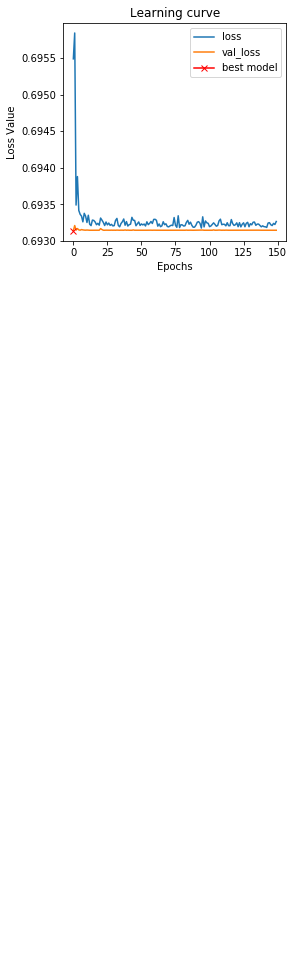

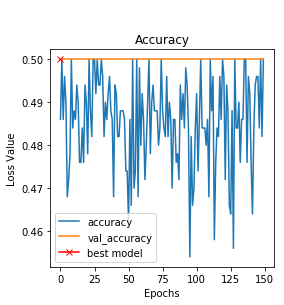

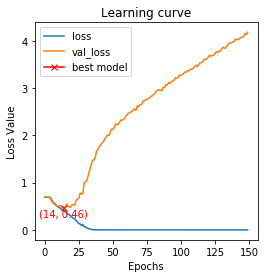

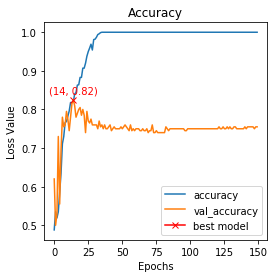

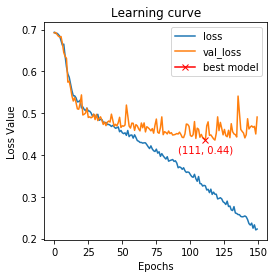

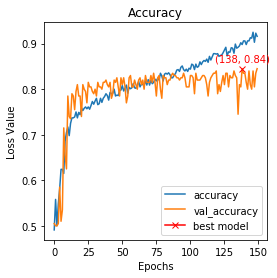

In [24]:
img_w, img_h = 128, 128
base = 32
batchsize = 8
n_epochs = 150
for LR in [1e-3, 1e-4, 1e-5]:
    #Building the model
    clf = model(1, img_w, img_h, base)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))
    
    #Loss
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    xmin = np.argmin(clf_hist.history["val_loss"])
    ymin = np.min(clf_hist.history["val_loss"])
    plt.plot( xmin, ymin, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
                 horizontalalignment = "center", verticalalignment = "top", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6E/loss_lr_'+str(LR)+'.png', dpi = 200)
    
    #Accuracy
    plt.figure(figsize=(4, 4))
    plt.title("Accuracy")
    plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
    plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
    ymax = np.max(clf_hist.history["val_binary_accuracy"])
    plt.plot( xmax, ymax, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6E/acc_lr_'+str(LR)+'.png', dpi = 200)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 128, 128, 4)       40        
_________________________________________________________________
activation_160 (Activation)  (None, 128, 128, 4)       0         
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 64, 64, 4)         0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 64, 64, 8)         296       
_________________________________________________________________
activation_161 (Activation)  (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 32, 32, 16)      

Epoch 33/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5821 - binary_accuracy: 0.7190 - val_loss: 0.5873 - val_binary_accuracy: 0.7150
Epoch 34/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5802 - binary_accuracy: 0.7190 - val_loss: 0.5858 - val_binary_accuracy: 0.7600
Epoch 35/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5802 - binary_accuracy: 0.7190 - val_loss: 0.5784 - val_binary_accuracy: 0.7400
Epoch 36/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5755 - binary_accuracy: 0.7360 - val_loss: 0.5738 - val_binary_accuracy: 0.7550
Epoch 37/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5698 - binary_accuracy: 0.7350 - val_loss: 0.5756 - val_binary_accuracy: 0.7650
Epoch 38/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5680 - binary_accuracy: 0.7200 - val_loss: 0.5692 - val_binary_accuracy: 0.7550
Epoch 39/100
1000/1000 [====

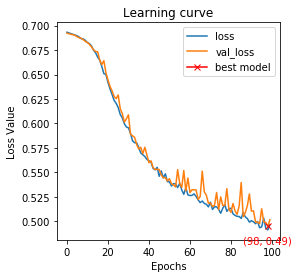

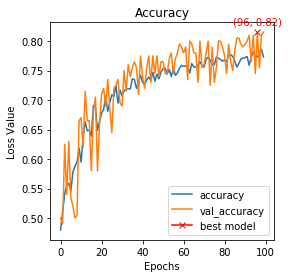

In [32]:
img_w, img_h = 128, 128
base = 8
batchsize = 4
n_epochs = 100
LR = 1e-5
#Building the model
clf = model(1, img_w, img_h, base)
clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))  

#Loss
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
xmin = np.argmin(clf_hist.history["val_loss"])
ymin = np.min(clf_hist.history["val_loss"])
plt.plot( xmin, ymin, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
             horizontalalignment = "center", verticalalignment = "top", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('6E/loss_bestmodel.png', dpi = 200)
 
#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('6E/acc_bestmodel.png', dpi = 200)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 128, 128, 8)       80        
_________________________________________________________________
activation_168 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_169 (Activation)  (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 32, 32, 32)      

Epoch 33/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6930 - binary_accuracy: 0.5000 - val_loss: 0.6930 - val_binary_accuracy: 0.5000
Epoch 34/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6930 - binary_accuracy: 0.5000 - val_loss: 0.6930 - val_binary_accuracy: 0.5000
Epoch 35/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6930 - binary_accuracy: 0.5000 - val_loss: 0.6929 - val_binary_accuracy: 0.5000
Epoch 36/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6930 - binary_accuracy: 0.5000 - val_loss: 0.6929 - val_binary_accuracy: 0.5000
Epoch 37/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6930 - binary_accuracy: 0.5000 - val_loss: 0.6929 - val_binary_accuracy: 0.5000
Epoch 38/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6930 - binary_accuracy: 0.5000 - val_loss: 0.6929 - val_binary_accuracy: 0.5000
Epoch 39/100
1000/1000 [====

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6929 - binary_accuracy: 0.5000 - val_loss: 0.6928 - val_binary_accuracy: 0.5000
Epoch 84/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6929 - binary_accuracy: 0.5000 - val_loss: 0.6928 - val_binary_accuracy: 0.5000
Epoch 85/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6929 - binary_accuracy: 0.5000 - val_loss: 0.6928 - val_binary_accuracy: 0.5000
Epoch 86/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6929 - binary_accuracy: 0.5000 - val_loss: 0.6928 - val_binary_accuracy: 0.5000
Epoch 87/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6929 - binary_accuracy: 0.5000 - val_loss: 0.6928 - val_binary_accuracy: 0.5000
Epoch 88/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6929 - binary_accuracy: 0.5000 - val_loss: 0.6928 - val_binary_accuracy: 0.5000
Epoch 89/100
1000/1000 [=================

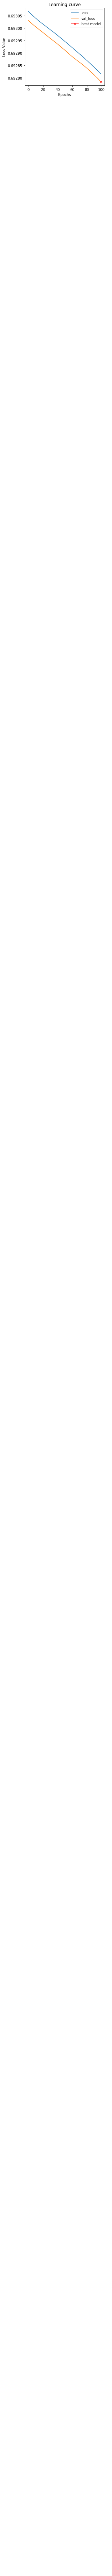

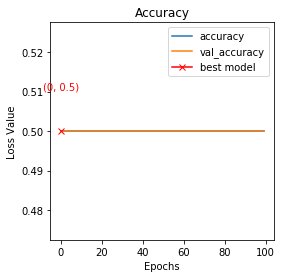

In [38]:
img_w, img_h = 128, 128
base = 8
batchsize = 4
n_epochs = 100
LR = 1e-5
#Building the model
clf = model(1, img_w, img_h, base)
clf.compile(loss='binary_crossentropy', optimizer = SGD(lr = LR), metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))  

#Loss
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
xmin = np.argmin(clf_hist.history["val_loss"])
ymin = np.min(clf_hist.history["val_loss"])
plt.plot( xmin, ymin, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
             horizontalalignment = "center", verticalalignment = "top", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('6E/loss_bestmodel_SGD.png', dpi = 200)
 
#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('6E/acc_bestmodel_SGD.png', dpi = 200)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 128, 128, 8)       80        
_________________________________________________________________
activation_176 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_177 (Activation)  (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 32, 32, 32)      

Epoch 33/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5444 - binary_accuracy: 0.7390 - val_loss: 0.5471 - val_binary_accuracy: 0.7750
Epoch 34/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5461 - binary_accuracy: 0.7310 - val_loss: 0.5508 - val_binary_accuracy: 0.7900
Epoch 35/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5453 - binary_accuracy: 0.7410 - val_loss: 0.5485 - val_binary_accuracy: 0.7650
Epoch 36/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5429 - binary_accuracy: 0.7280 - val_loss: 0.5406 - val_binary_accuracy: 0.7900
Epoch 37/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5419 - binary_accuracy: 0.7370 - val_loss: 0.5389 - val_binary_accuracy: 0.7900
Epoch 38/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5371 - binary_accuracy: 0.7410 - val_loss: 0.5512 - val_binary_accuracy: 0.7450
Epoch 39/100
1000/1000 [====

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4949 - binary_accuracy: 0.7670 - val_loss: 0.5196 - val_binary_accuracy: 0.8050
Epoch 84/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4986 - binary_accuracy: 0.7700 - val_loss: 0.5267 - val_binary_accuracy: 0.7900
Epoch 85/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4999 - binary_accuracy: 0.7710 - val_loss: 0.5004 - val_binary_accuracy: 0.8150
Epoch 86/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4980 - binary_accuracy: 0.7630 - val_loss: 0.4914 - val_binary_accuracy: 0.8200
Epoch 87/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4964 - binary_accuracy: 0.7690 - val_loss: 0.4927 - val_binary_accuracy: 0.8050
Epoch 88/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4982 - binary_accuracy: 0.7670 - val_loss: 0.4909 - val_binary_accuracy: 0.8300
Epoch 89/100
1000/1000 [=================

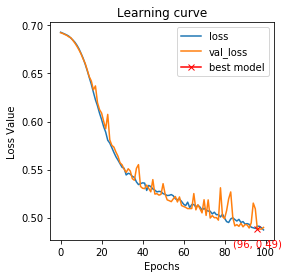

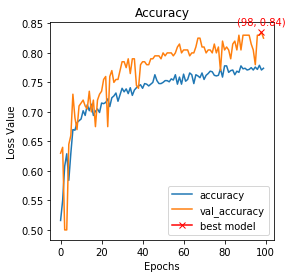

In [39]:
img_w, img_h = 128, 128
base = 8
batchsize = 4
n_epochs = 100
LR = 1e-5
#Building the model
clf = model(1, img_w, img_h, base)
clf.compile(loss='binary_crossentropy', optimizer = RMSprop(lr = LR), metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))  

#Loss
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
xmin = np.argmin(clf_hist.history["val_loss"])
ymin = np.min(clf_hist.history["val_loss"])
plt.plot( xmin, ymin, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
             horizontalalignment = "center", verticalalignment = "top", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('6E/loss_bestmodel_rmsprop.png', dpi = 200)
 
#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('6E/acc_bestmodel_rmsprop.png', dpi = 200)

# Task 6F 

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 128, 128, 8)       80        
_________________________________________________________________
activation_184 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_185 (Activation)  (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 32, 32, 32)      

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.8257 - binary_accuracy: 0.3760 - val_loss: 0.8148 - val_binary_accuracy: 0.4400
Epoch 33/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.8270 - binary_accuracy: 0.3850 - val_loss: 0.7934 - val_binary_accuracy: 0.3950
Epoch 34/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.8135 - binary_accuracy: 0.3860 - val_loss: 0.7861 - val_binary_accuracy: 0.3950
Epoch 35/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.8104 - binary_accuracy: 0.3730 - val_loss: 0.7888 - val_binary_accuracy: 0.4300
Epoch 36/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.8044 - binary_accuracy: 0.3860 - val_loss: 0.7789 - val_binary_accuracy: 0.4150
Epoch 37/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.8051 - binary_accuracy: 0.3890 - val_loss: 0.7762 - val_binary_accuracy: 0.4200
Epoch 38/100
1000/1000 [=================

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.7411 - binary_accuracy: 0.3750 - val_loss: 0.7078 - val_binary_accuracy: 0.3950
Epoch 83/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.7389 - binary_accuracy: 0.3840 - val_loss: 0.7054 - val_binary_accuracy: 0.3750
Epoch 84/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.7378 - binary_accuracy: 0.3820 - val_loss: 0.7766 - val_binary_accuracy: 0.2650
Epoch 85/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.7466 - binary_accuracy: 0.3740 - val_loss: 0.7066 - val_binary_accuracy: 0.3950
Epoch 86/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.7462 - binary_accuracy: 0.3690 - val_loss: 0.7077 - val_binary_accuracy: 0.3700
Epoch 87/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.7394 - binary_accuracy: 0.3660 - val_loss: 0.7049 - val_binary_accuracy: 0.3950
Epoch 88/100
1000/1000 [=================

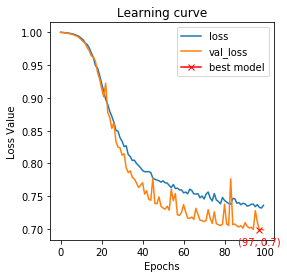

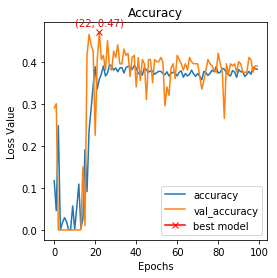

In [40]:
img_w, img_h = 128, 128
base = 8
batchsize = 4
n_epochs = 100
LR = 1e-5

#Prepare the y dataset
y_test[y_test == 0] = -1
y_train[y_train == 0] = -1

#Building the model
clf = model(1, img_w, img_h, base)
clf.compile(loss='hinge', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))  

#Loss
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
xmin = np.argmin(clf_hist.history["val_loss"])
ymin = np.min(clf_hist.history["val_loss"])
plt.plot( xmin, ymin, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
             horizontalalignment = "center", verticalalignment = "top", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('6F/loss_hinge.png', dpi = 200)
 
#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('6F/acc_hinge.png', dpi = 200)

# Task 7A

In [42]:
# Logic operator with Tensorflow Keras and importation of matplotlib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [43]:
def model_vgg16(img_ch, img_width, img_height, n_base):
    model = Sequential()
    
    model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model

# Task 7B

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_172 (Conv2D)          (None, 128, 128, 8)       80        
_________________________________________________________________
activation_256 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_173 (Conv2D)          (None, 128, 128, 8)       584       
_________________________________________________________________
activation_257 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_258 (Activation)  (None, 64, 64, 16)      

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6933 - binary_accuracy: 0.4940 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 18/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6934 - binary_accuracy: 0.4900 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 19/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6933 - binary_accuracy: 0.5000 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 20/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6933 - binary_accuracy: 0.4920 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 21/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6933 - binary_accuracy: 0.4820 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 22/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6934 - binary_accuracy: 0.4760 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 23/100
1000/1000 [=================

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6933 - binary_accuracy: 0.4960 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 68/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6932 - binary_accuracy: 0.4880 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 69/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6932 - binary_accuracy: 0.4740 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 70/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6933 - binary_accuracy: 0.4940 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 71/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6932 - binary_accuracy: 0.4800 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 72/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6933 - binary_accuracy: 0.4820 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 73/100
1000/1000 [=================

Epoch 1/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.6932 - binary_accuracy: 0.4840 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6933 - binary_accuracy: 0.4730 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6933 - binary_accuracy: 0.5070 - val_loss: 0.6930 - val_binary_accuracy: 0.5050
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6930 - binary_accuracy: 0.5210 - val_loss: 0.6908 - val_binary_accuracy: 0.7500
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6694 - binary_accuracy: 0.5890 - val_loss: 0.6124 - val_binary_accuracy: 0.6600
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5697 - binary_accuracy: 0.7110 - val_loss: 0.5291 - val_binary_accuracy: 0.7500
Epoch 7/100
1000/1000 [===========

1000/1000 [==============================] - 2s 2ms/sample - loss: 8.3133e-04 - binary_accuracy: 1.0000 - val_loss: 1.4079 - val_binary_accuracy: 0.7850
Epoch 52/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 6.6556e-04 - binary_accuracy: 1.0000 - val_loss: 1.4483 - val_binary_accuracy: 0.7900
Epoch 53/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 5.4205e-04 - binary_accuracy: 1.0000 - val_loss: 1.4889 - val_binary_accuracy: 0.7900
Epoch 54/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 4.4987e-04 - binary_accuracy: 1.0000 - val_loss: 1.5189 - val_binary_accuracy: 0.7850
Epoch 55/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 3.7700e-04 - binary_accuracy: 1.0000 - val_loss: 1.5457 - val_binary_accuracy: 0.7900
Epoch 56/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 3.3002e-04 - binary_accuracy: 1.0000 - val_loss: 1.5693 - val_binary_accuracy: 0.7950
Epoch 57/100
1000

1000/1000 [==============================] - 2s 2ms/sample - loss: 5.3555e-06 - binary_accuracy: 1.0000 - val_loss: 2.4988 - val_binary_accuracy: 0.7750
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_198 (Conv2D)          (None, 128, 128, 8)       80        
_________________________________________________________________
activation_288 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_199 (Conv2D)          (None, 128, 128, 8)       584       
_________________________________________________________________
activation_289 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_200 (Conv2D)          (No

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6386 - binary_accuracy: 0.6680 - val_loss: 0.6332 - val_binary_accuracy: 0.6850
Epoch 17/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6289 - binary_accuracy: 0.6710 - val_loss: 0.6244 - val_binary_accuracy: 0.6800
Epoch 18/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6158 - binary_accuracy: 0.6820 - val_loss: 0.6154 - val_binary_accuracy: 0.6950
Epoch 19/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6035 - binary_accuracy: 0.6880 - val_loss: 0.6199 - val_binary_accuracy: 0.6850
Epoch 20/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5980 - binary_accuracy: 0.6940 - val_loss: 0.5944 - val_binary_accuracy: 0.7150
Epoch 21/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5904 - binary_accuracy: 0.6950 - val_loss: 0.5898 - val_binary_accuracy: 0.7000
Epoch 22/100
1000/1000 [=================

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3964 - binary_accuracy: 0.8320 - val_loss: 0.4960 - val_binary_accuracy: 0.7650
Epoch 67/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3846 - binary_accuracy: 0.8450 - val_loss: 0.4910 - val_binary_accuracy: 0.7800
Epoch 68/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3886 - binary_accuracy: 0.8230 - val_loss: 0.4950 - val_binary_accuracy: 0.7600
Epoch 69/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3812 - binary_accuracy: 0.8250 - val_loss: 0.4841 - val_binary_accuracy: 0.7800
Epoch 70/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3833 - binary_accuracy: 0.8370 - val_loss: 0.4878 - val_binary_accuracy: 0.7850
Epoch 71/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3735 - binary_accuracy: 0.8390 - val_loss: 0.4909 - val_binary_accuracy: 0.7600
Epoch 72/100
1000/1000 [=================

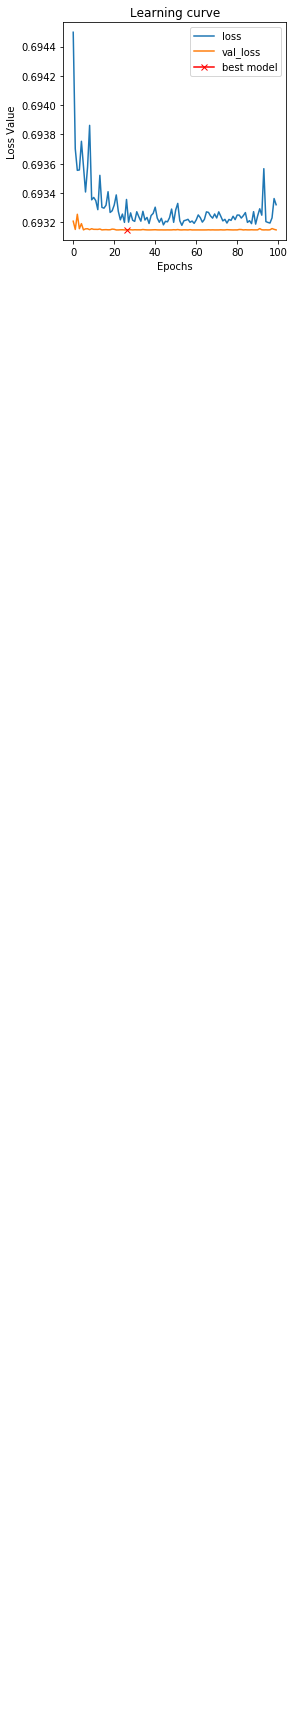

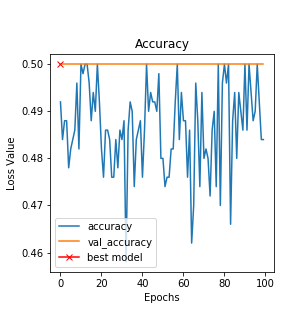

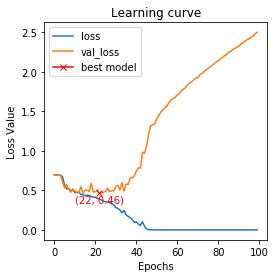

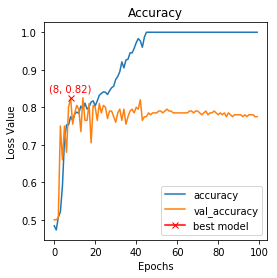

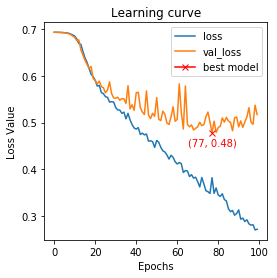

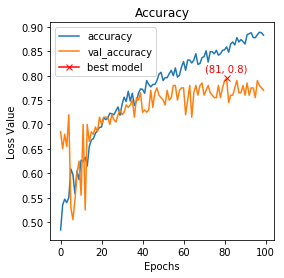

In [47]:
img_w, img_h = 128, 128
base = 8
batchsize = 8
n_epochs = 100
for LR in [1e-3, 1e-4, 1e-5]:
    #Building the model
    clf = model_vgg16(1, img_w, img_h, base)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))
    
    #Loss
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    xmin = np.argmin(clf_hist.history["val_loss"])
    ymin = np.min(clf_hist.history["val_loss"])
    plt.plot( xmin, ymin, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
                 horizontalalignment = "center", verticalalignment = "top", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('7B/loss_lr_'+str(LR)+'.png', dpi = 200)
    
    #Accuracy
    plt.figure(figsize=(4, 4))
    plt.title("Accuracy")
    plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
    plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
    ymax = np.max(clf_hist.history["val_binary_accuracy"])
    plt.plot( xmax, ymax, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('7B/acc_lr_'+str(LR)+'.png', dpi = 200)

# Task 7C

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_211 (Conv2D)          (None, 128, 128, 8)       80        
_________________________________________________________________
activation_304 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_212 (Conv2D)          (None, 128, 128, 8)       584       
_________________________________________________________________
activation_305 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_213 (Conv2D)          (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_306 (Activation)  (None, 64, 64, 16)      

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5320 - binary_accuracy: 0.7590 - val_loss: 0.5204 - val_binary_accuracy: 0.7950
Epoch 18/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5322 - binary_accuracy: 0.7420 - val_loss: 0.5240 - val_binary_accuracy: 0.7600
Epoch 19/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5324 - binary_accuracy: 0.7420 - val_loss: 0.5188 - val_binary_accuracy: 0.8000
Epoch 20/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5343 - binary_accuracy: 0.7290 - val_loss: 0.5516 - val_binary_accuracy: 0.7400
Epoch 21/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5300 - binary_accuracy: 0.7370 - val_loss: 0.5132 - val_binary_accuracy: 0.7700
Epoch 22/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5214 - binary_accuracy: 0.7580 - val_loss: 0.5119 - val_binary_accuracy: 0.7850
Epoch 23/150
1000/1000 [=================

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4816 - binary_accuracy: 0.7730 - val_loss: 0.4727 - val_binary_accuracy: 0.8250
Epoch 68/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4803 - binary_accuracy: 0.7690 - val_loss: 0.4794 - val_binary_accuracy: 0.8000
Epoch 69/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4773 - binary_accuracy: 0.7720 - val_loss: 0.5171 - val_binary_accuracy: 0.7600
Epoch 70/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4869 - binary_accuracy: 0.7680 - val_loss: 0.4720 - val_binary_accuracy: 0.8200
Epoch 71/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4831 - binary_accuracy: 0.7710 - val_loss: 0.4720 - val_binary_accuracy: 0.8250
Epoch 72/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4780 - binary_accuracy: 0.7740 - val_loss: 0.4667 - val_binary_accuracy: 0.8300
Epoch 73/150
1000/1000 [=================

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4231 - binary_accuracy: 0.8000 - val_loss: 0.4450 - val_binary_accuracy: 0.8150
Epoch 118/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4213 - binary_accuracy: 0.8030 - val_loss: 0.4492 - val_binary_accuracy: 0.8000
Epoch 119/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4233 - binary_accuracy: 0.8060 - val_loss: 0.4627 - val_binary_accuracy: 0.7900
Epoch 120/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4175 - binary_accuracy: 0.8100 - val_loss: 0.4520 - val_binary_accuracy: 0.7950
Epoch 121/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4189 - binary_accuracy: 0.8060 - val_loss: 0.4490 - val_binary_accuracy: 0.8000
Epoch 122/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4182 - binary_accuracy: 0.8100 - val_loss: 0.4507 - val_binary_accuracy: 0.8000
Epoch 123/150
1000/1000 [===========

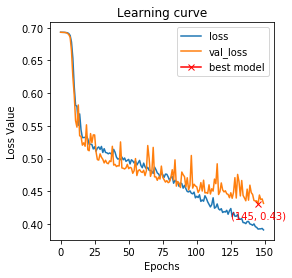

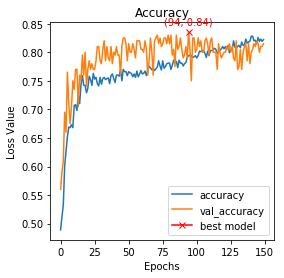

In [48]:
img_w, img_h = 128, 128
base = 8
batchsize = 8
LR = 1e-5
n_epochs = 150

#Building the models
clf = model_vgg16(1, img_w, img_h, base)
clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))
    
#Plotting curves
#Loss
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
xmin = np.argmin(clf_hist.history["val_loss"])
ymin = np.min(clf_hist.history["val_loss"])
plt.plot( xmin, ymin, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
             horizontalalignment = "center", verticalalignment = "top", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('7C/loss_'+str(n_epochs)+'.png', dpi = 200)

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('7C/acc_'+str(n_epochs)+'.png', dpi = 200)

# Task 7D

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_224 (Conv2D)          (None, 128, 128, 16)      160       
_________________________________________________________________
activation_320 (Activation)  (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_225 (Conv2D)          (None, 128, 128, 16)      2320      
_________________________________________________________________
activation_321 (Activation)  (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_226 (Conv2D)          (None, 64, 64, 32)        4640      
_________________________________________________________________
activation_322 (Activation)  (None, 64, 64, 32)      

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5149 - binary_accuracy: 0.7570 - val_loss: 0.4977 - val_binary_accuracy: 0.7900
Epoch 18/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5152 - binary_accuracy: 0.7600 - val_loss: 0.5332 - val_binary_accuracy: 0.7700
Epoch 19/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5057 - binary_accuracy: 0.7590 - val_loss: 0.4847 - val_binary_accuracy: 0.7950
Epoch 20/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5094 - binary_accuracy: 0.7600 - val_loss: 0.4959 - val_binary_accuracy: 0.7950
Epoch 21/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5101 - binary_accuracy: 0.7550 - val_loss: 0.4787 - val_binary_accuracy: 0.8000
Epoch 22/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5013 - binary_accuracy: 0.7670 - val_loss: 0.5102 - val_binary_accuracy: 0.7850
Epoch 23/100
1000/1000 [=================

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4415 - binary_accuracy: 0.8020 - val_loss: 0.4403 - val_binary_accuracy: 0.8250
Epoch 68/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4365 - binary_accuracy: 0.7940 - val_loss: 0.4714 - val_binary_accuracy: 0.7950
Epoch 69/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4264 - binary_accuracy: 0.8110 - val_loss: 0.4581 - val_binary_accuracy: 0.8100
Epoch 70/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4273 - binary_accuracy: 0.7990 - val_loss: 0.4576 - val_binary_accuracy: 0.8150
Epoch 71/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4240 - binary_accuracy: 0.8070 - val_loss: 0.4702 - val_binary_accuracy: 0.7700
Epoch 72/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4344 - binary_accuracy: 0.7990 - val_loss: 0.4562 - val_binary_accuracy: 0.8100
Epoch 73/100
1000/1000 [=================

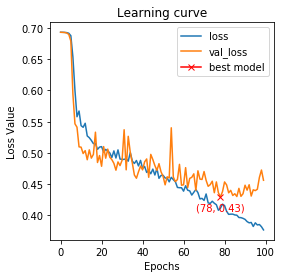

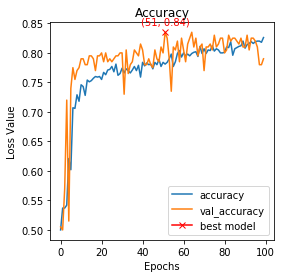

In [49]:
img_w, img_h = 128, 128
base = 16
batchsize = 8
LR = 1e-5
n_epochs = 100

#Building the models
clf = model_vgg16(1, img_w, img_h, base)
clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))
    
#Plotting curves
#Loss
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
xmin = np.argmin(clf_hist.history["val_loss"])
ymin = np.min(clf_hist.history["val_loss"])
plt.plot( xmin, ymin, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
             horizontalalignment = "center", verticalalignment = "top", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('7D/loss.png', dpi = 200)

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('7D/acc.png', dpi = 200)

In [50]:
def model_vgg16_dropout(img_ch, img_width, img_height, n_base):
    model = Sequential()
    
    model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_237 (Conv2D)          (None, 128, 128, 16)      160       
_________________________________________________________________
activation_336 (Activation)  (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_238 (Conv2D)          (None, 128, 128, 16)      2320      
_________________________________________________________________
activation_337 (Activation)  (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_239 (Conv2D)          (None, 64, 64, 32)        4640      
_________________________________________________________________
activation_338 (Activation)  (None, 64, 64, 32)      

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6907 - binary_accuracy: 0.5410 - val_loss: 0.6886 - val_binary_accuracy: 0.5050
Epoch 15/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6905 - binary_accuracy: 0.5470 - val_loss: 0.6851 - val_binary_accuracy: 0.5950
Epoch 16/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6860 - binary_accuracy: 0.5870 - val_loss: 0.6762 - val_binary_accuracy: 0.6800
Epoch 17/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6842 - binary_accuracy: 0.5920 - val_loss: 0.6714 - val_binary_accuracy: 0.6500
Epoch 18/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6682 - binary_accuracy: 0.6130 - val_loss: 0.6375 - val_binary_accuracy: 0.6650
Epoch 19/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6501 - binary_accuracy: 0.6380 - val_loss: 0.6249 - val_binary_accuracy: 0.7200
Epoch 20/100
1000/1000 [=================

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4776 - binary_accuracy: 0.7920 - val_loss: 0.4292 - val_binary_accuracy: 0.8250
Epoch 65/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4619 - binary_accuracy: 0.8050 - val_loss: 0.4228 - val_binary_accuracy: 0.8300
Epoch 66/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4665 - binary_accuracy: 0.7880 - val_loss: 0.4191 - val_binary_accuracy: 0.8550
Epoch 67/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4811 - binary_accuracy: 0.7870 - val_loss: 0.4149 - val_binary_accuracy: 0.8400
Epoch 68/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4586 - binary_accuracy: 0.7890 - val_loss: 0.4713 - val_binary_accuracy: 0.8000
Epoch 69/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4712 - binary_accuracy: 0.7970 - val_loss: 0.4413 - val_binary_accuracy: 0.8000
Epoch 70/100
1000/1000 [=================

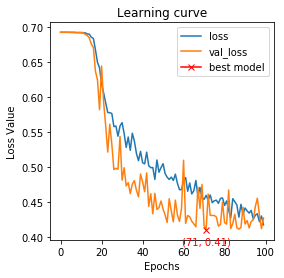

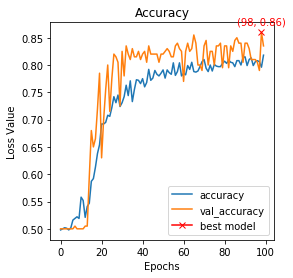

In [51]:
img_w, img_h = 128, 128
base = 16
batchsize = 8
LR = 1e-5
n_epochs = 100

#Building the models
clf = model_vgg16_dropout(1, img_w, img_h, base)
clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))
    
#Plotting curves
#Loss
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
xmin = np.argmin(clf_hist.history["val_loss"])
ymin = np.min(clf_hist.history["val_loss"])
plt.plot( xmin, ymin, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
             horizontalalignment = "center", verticalalignment = "top", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('7D/loss_dropout.png', dpi = 200)

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('7D/acc_dropout.png', dpi = 200)